# Análise Exploratória Inicial

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from collections import defaultdict
from collections import  Counter
import seaborn as sns

In [4]:
dialogues = pd.read_csv('Family_Guy.csv', nrows = 50000)
dialogues_size = len(dialogues['Dialogue'].tolist())

#### Foi verificado em testes, que algumas linhas não possuem diálogos válidos, portanto, serão descontados do dataset as linhas que possuem diálogos inválidos, em que:

In [5]:
# Filter out rows where 'Dialogue' is not a valid string
invalid_dialogues = dialogues[~dialogues['Dialogue'].apply(lambda x: isinstance(x, str) and x.strip() != '')]
invalid_dialogues_size = len(invalid_dialogues['Dialogue'].tolist())

# Display the rows with valid dialogues
print(dialogues_size)
print(invalid_dialogues_size)

#Filter the dataset to dataset that just contains valid dialogues
dialogues = dialogues[dialogues['Dialogue'].apply(lambda x: isinstance(x, str) and x.strip() != '')]

50000
0


In [6]:
dialogues.head(10)

Season  Episode Time_Stamp     Character  \
0       1        1   00:00:07    Daughter A   
1       1        1   00:00:10         Dad A   
2       1        1   00:00:10         Son A   
3       1        1   00:00:12         Dad A   
4       1        1   00:00:14         Dad A   
5       1        1   00:00:18         Dad A   
6       1        1   00:00:20         Son A   
7       1        1   00:00:22    Daughter A   
8       1        1   00:00:26         Dad A   
9       1        1   00:00:29  Lois Griffin   

                                            Dialogue  \
0     Mom, Dad, I found cigarettes in Greg's jacket.   
1                 Greg, were you smoking cigarettes?   
2                                           No, Dad.   
3           He's lying. There's no doubt about that.   
4  Greg, I'm afraid your punishment will be four ...   
5  That'll give you time to think about what you ...   
6                                               Man!   
7                                 That'll teach him.   
8  Jan, I'm afraid you've earned a day in the fir...   
9     Smoking. How does a boy like that go so wrong?   

                               NRC_Sentiment AFINN_Sentiment  \
0                         joy,positive,trust         Neutral   
1                                    Neutral         Neutral   
2                                    Neutral        Negative   
3  anger,disgust,fear,negative,sadness,trust        Negative   
4                anger,disgust,fear,negative        Negative   
5                               anticipation         Neutral   
6                                    Neutral         Neutral   
7                joy,positive,surprise,trust         Neutral   
8               fear,negative,positive,trust        Negative   
9                                   negative         Neutral   

   AFINN_Sentiment_Score BING_Sentiment  
0                      0        Neutral  
1                      0        Neutral  
2                     -2        Neutral  
3                     -2       Negative  
4                     -2       Negative  
5                      0        Neutral  
6                      0        Neutral  
7                      0        Neutral  
8                     -4       Negative  
9                      0       Positive

### (Aqui podemos dizer algumas informações sobre a tabela, quais são colunas relevantes que iremos usar)

<Axes: >

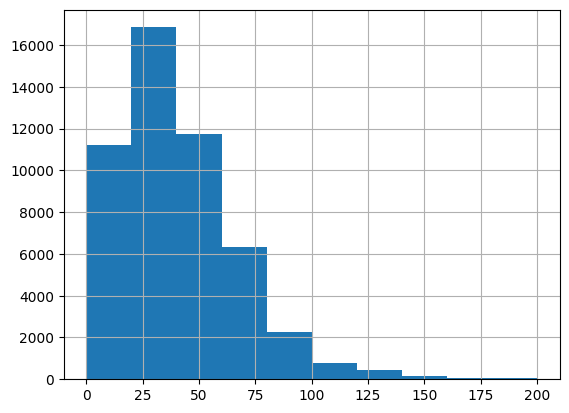

In [7]:
dialogues['Dialogue'].str.len().hist(range=[0, 200])

Isso demonstra que a maioria são diálogos curtos, com baixo número de caracteres. 

(eixo x = nº de caracteres/ diálogo | eixo y = nº de díalogos)

<Axes: >

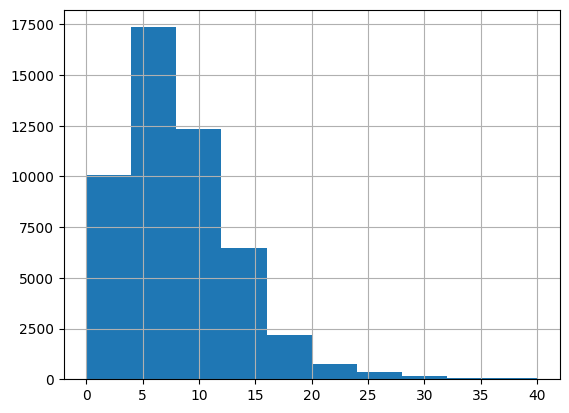

In [8]:
dialogues['Dialogue'].str.split().map(lambda x: len(x)).hist(range=[0, 40])

Ainda mais, podemos ver que em grande maioria, os diálogos também possui poucas palavras, sendo em maioria em torno de 4. Resultando em uma série mais fácil de assitir.

(eixo x = nº de palavras/ diálogo | eixo y = nº de díalogos)

In [9]:
import nltk
nltk.download('stopwords')
stop=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\João\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
corpus=[]
dialogue = dialogues['Dialogue'].str.split()
dialogue=dialogue.values.tolist()
corpus=[word for i in dialogue for word in i]
dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1

<BarContainer object of 10 artists>

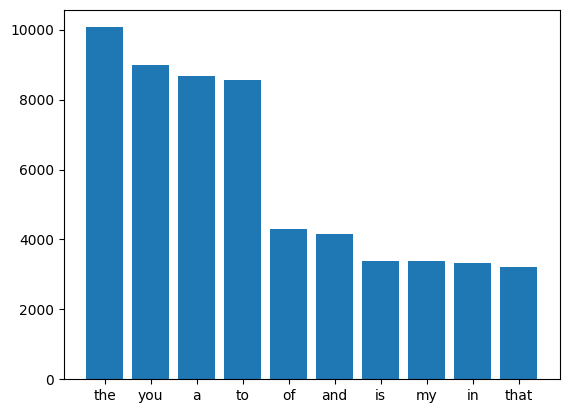

In [11]:
 top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
 x,y=zip(*top)
 plt.bar(x,y)

!!! Através do código a acima, podemos ver que muitas das palavras curtas utilizadas no diálogo, são provenientes de stopwords, em que na questão dos díalogos, são o *the* and *a* para referenciar um objeto, lugar ou pessoa and you, referenciando a pessoa com quem está dialogando.

<Axes: >

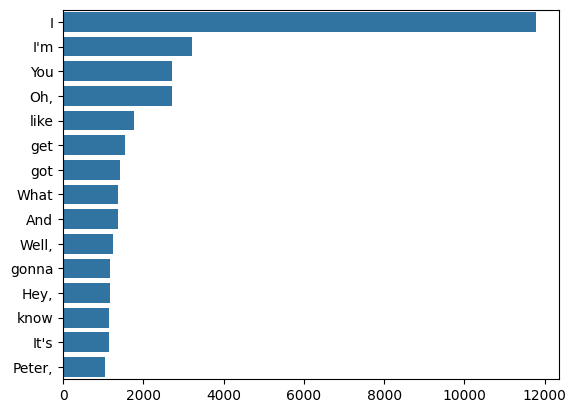

In [12]:
counter=Counter(corpus)
most=counter.most_common()

x, y= [], []
for word,count in most[:50]:
    if (word not in stop):
        x.append(word)
        y.append(count)

sns.barplot(x=y,y=x)

Podemos ver que a maioria das palavras são para comunicação nos diálogos (referênciando a própria pessoa ou a terceira pessoa).

# Análise de tópicos

In [13]:
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
import gensim
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.tokenize import word_tokenize
import pyLDAvis.gensim

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\João\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\João\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\João\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [14]:
def get_lda_objects(text):
    
    stop=set(stopwords.words('english'))

    def _preprocess_text(text):
        corpus=[]
        stem=PorterStemmer()
        lem=WordNetLemmatizer()
        for dialogues in text:
            words=[w for w in word_tokenize(dialogues) if (w not in stop)]
            words=[lem.lemmatize(w) for w in words if len(w)>2]

            corpus.append(words)
        return corpus

    corpus=_preprocess_text(text)

    dic=gensim.corpora.Dictionary(corpus)
    bow_corpus = [dic.doc2bow(doc) for doc in corpus]
    
    lda_model =  gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = 14, 
                                   id2word = dic,                                    
                                   passes = 30,
                                   workers = 2)
    
    return lda_model, bow_corpus, dic

## Creating Topic Distance Visualization 

In [15]:
def plot_lda_vis(lda_model, bow_corpus, dic):
    pyLDAvis.enable_notebook()
    vis = pyLDAvis.gensim.prepare(lda_model, bow_corpus, dic)
    return vis

In [16]:
lda_model, bow_corpus, dic = get_lda_objects(dialogues['Dialogue'])

In [17]:
lda_model.show_topics()

[(3,
  '0.116*"God" + 0.066*"Meg" + 0.045*"love" + 0.019*"help" + 0.018*"Hey" + 0.018*"huh" + 0.017*"everybody" + 0.015*"father" + 0.015*"must" + 0.013*"honey"'),
 (9,
  '0.168*"n\'t" + 0.066*"Brian" + 0.064*"Hey" + 0.035*"say" + 0.024*"need" + 0.023*"There" + 0.022*"Look" + 0.018*"would" + 0.018*"come" + 0.014*"Quagmire"'),
 (8,
  '0.093*"Yeah" + 0.045*"Stewie" + 0.044*"This" + 0.025*"Okay" + 0.025*"Why" + 0.023*"let" + 0.022*"great" + 0.019*"Here" + 0.017*"kind" + 0.014*"stop"'),
 (10,
  '0.105*"\'ll" + 0.055*"see" + 0.040*"good" + 0.032*"How" + 0.030*"tell" + 0.023*"Let" + 0.020*"get" + 0.020*"show" + 0.017*"find" + 0.016*"take"'),
 (13,
  '0.100*"Lois" + 0.053*"Griffin" + 0.048*"Chris" + 0.031*"feel" + 0.029*"yeah" + 0.027*"better" + 0.024*"big" + 0.022*"Mr." + 0.016*"world" + 0.015*"talking"'),
 (2,
  '0.153*"You" + 0.106*"\'re" + 0.089*"know" + 0.080*"Peter" + 0.059*"n\'t" + 0.044*"want" + 0.042*"think" + 0.028*"gon" + 0.011*"really" + 0.011*"get"'),
 (4,
  '0.264*"..." + 0.027*"

In [18]:
plot_lda_vis(lda_model, bow_corpus, dic)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.302493 -0.047826       1        1  10.650630
9      0.249322 -0.020513       2        1   8.955118
7      0.029694  0.229476       3        1   8.199536
10     0.048975  0.115430       4        1   7.770332
11    -0.091029  0.168311       5        1   7.245002
5     -0.056749  0.130086       6        1   7.151714
12    -0.027989  0.017472       7        1   7.008127
8     -0.047836 -0.046002       8        1   6.702512
0     -0.091159  0.005945       9        1   6.478837
4     -0.025979 -0.126940      10        1   6.345836
6      0.012231 -0.099406      11        1   6.242169
13    -0.164880 -0.018395      12        1   5.937674
1     -0.045356 -0.101100      13        1   5.900331
3     -0.091738 -0.206537      14        1   5.412183, topic_info=       Term         Freq        Total Category  logprob  loglift
317     ...  3688.000000  3688.000000  Default  30.0000  30.0000
89      n't  4697.000000  4697.000000  Default  29.0000  29.0000
42      You  3597.000000  3597.000000  Default  28.0000  28.0000
176    What  2244.000000  2244.000000  Default  27.0000  27.0000
33     like  2167.000000  2167.000000  Default  26.0000  26.0000
...     ...          ...          ...      ...      ...      ...
1261  heard    79.926633   130.700604  Topic14  -5.0048   2.4247
450     Hey   217.024543  1485.588648  Topic14  -4.0059   0.9930
729    game    75.379541   126.186367  Topic14  -5.0634   2.4013
852   sorry    92.062104   403.195549  Topic14  -4.8634   1.4396
179   still    87.441693   313.305162  Topic14  -4.9149   1.6403

[627 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
3225      8  0.980122  'cause
2483     13  0.993257     'em
15        4  0.999199     'll
196       1  0.880506     're
196      10  0.119246     're
...     ...       ...     ...
34       11  0.992896   wrong
1566     12  0.997783    yeah
672       6  0.996345    year
1269      7  0.990228     yes
1125      6  0.992915     yet

[781 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 10, 8, 11, 12, 6, 13, 9, 1, 5, 7, 14, 2, 4])

# Reconhecimento de Entidades

In [19]:
import spacy
from spacy import displacy
from collections import  Counter
import seaborn as sns

nlp = spacy.load("en_core_web_sm")

In [20]:
def ner(text):
    doc=nlp(text)
    return [X.label_ for X in doc.ents]

In [32]:
ent=dialogues['Dialogue'].apply(lambda x : ner(x))
ent=[x for sub in ent for x in sub]

In [22]:
counter=Counter(ent)
count=counter.most_common()

<Axes: >

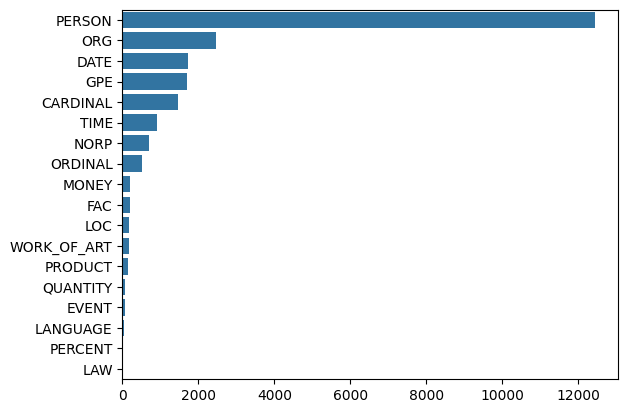

In [23]:
x,y=map(list,zip(*count))
sns.barplot(x=y,y=x)

In [27]:
#(Quantidade de de palavras por tag)

### Tokens mais comuns por entidade

In [28]:
### Explicação de algumas tags (entidades) utilizadas na tokenização por entidade
### PERSON (Pessoas, incluindo ficção)
### ORG (Companias, agências e instituições)
### GPE (Cidades, estados e países)

In [29]:
def plot_most_common_named_entity_barchart(text, entity="PERSON"):
    nlp = spacy.load("en_core_web_sm")
    
    def _get_ner(text,ent):
        doc=nlp(text)
        return [X.text for X in doc.ents if X.label_ == ent]

    entity_filtered=text.apply(lambda x: _get_ner(x,entity))
    entity_filtered=[i for x in entity_filtered for i in x]
    
    counter=Counter(entity_filtered)
    x,y=map(list,zip(*counter.most_common(10)))
    sns.barplot(x=y,y=x)

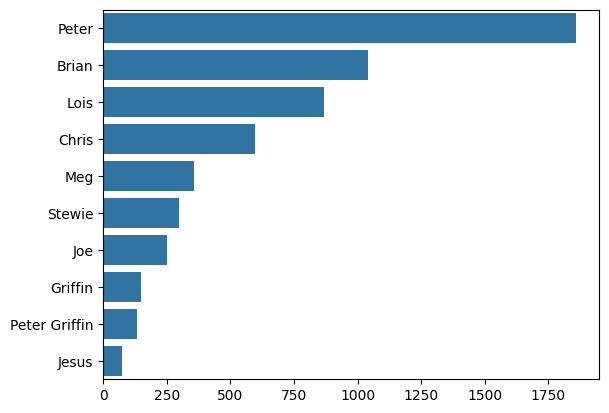

In [30]:
plot_most_common_named_entity_barchart(dialogues['Dialogue'], entity="PERSON")

Dessa forma, podemos verificar os personagens mais participantes nos diálogos, que é o Peter

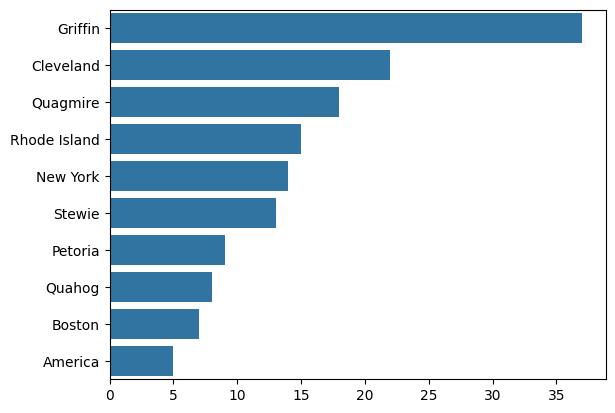

In [ ]:
plot_most_common_named_entity_barchart(dialogues['Dialogue'], entity="GPE")

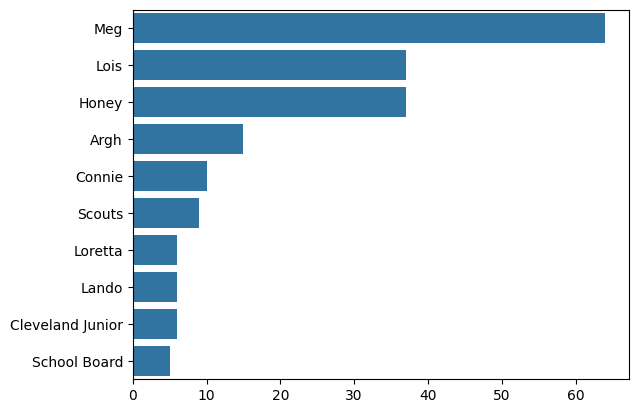

In [ ]:
plot_most_common_named_entity_barchart(dialogues['Dialogue'], entity="ORG")

Porém, verificamos que em outras categorias, como locais (estados, países e cidades) e organizações não possuem bons resultados, pois vários desses resultados são nomes ou sobrenomes de personagens. (é diferenciavel por contexto)

# Explorando falas

<Axes: >

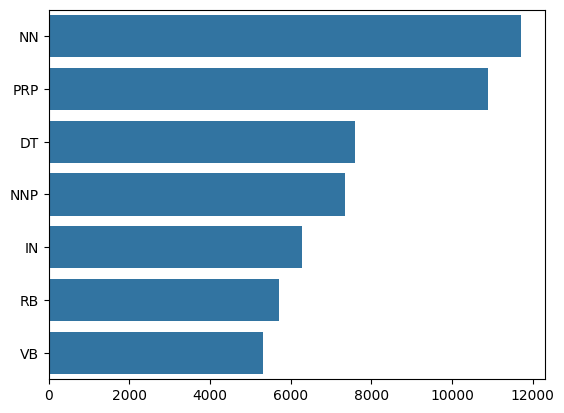

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
import seaborn as sns
from collections import Counter

def pos(text):
     # Tokenize the text and get POS tags
    pos_tags = nltk.pos_tag(word_tokenize(text))
    # Filter out punctuation tags (',' and '.') and their associated words
    filtered_pos = [(word, tag) for word, tag in pos_tags if tag not in [',', '.']]
    # Extract only the POS tags
    pos_tags_only = [tag for _, tag in filtered_pos]
    return pos_tags_only

tags=dialogues['Dialogue'].apply(lambda x : pos(x))
tags=[x for l in tags for x in l]
counter=Counter(tags)

x,y=list(map(list,zip(*counter.most_common(7))))
sns.barplot(x=y,y=x)

### Resumo do que seria cada tag obtida nos resultados
    Noun (NN)- Joseph, London, table, cat, teacher, pen, city
    Verb (VB)- read, speak, run, eat, play, live, walk, have, like, are, is
    Adjective(JJ)- beautiful, happy, sad, young, fun, three
    Adverb(RB)- slowly, quietly, very, always, never, too, well, tomorrow
    Preposition (IN)- at, on, in, from, with, near, between, about, under
    Conjunction (CC)- and, or, but, because, so, yet, unless, since, if
    Pronoun(PRP)- I, you, we, they, he, she, it, me, us, them, him, her, this
    Interjection (INT)- Ouch! Wow! Great! Help! Oh! Hey! Hi!


## Obtenção e Processamento de dados

Para fazer uma comparação entre os personaens primeiramente se foi feita  visualização da quantidade de falas por caracteres. Após feita essa visualização se separou os personagens, por idade e inteligência aparente, e então se foi comparados os gráficos para que as teorias sobre os resultados e os resultados fossem comparados.

<AxesSubplot:>

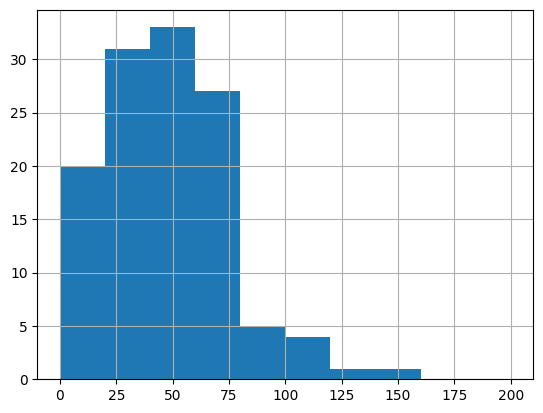

In [ ]:
dialogues = pd.read_csv('Family_Guy.csv', nrows = 50000)
stewieDialog = dialogues.loc[dialogues["Character"]=="Stewie Griffin"]
stewieDialog['Dialogue'].str.len().hist(range=[0, 200])

<AxesSubplot:>

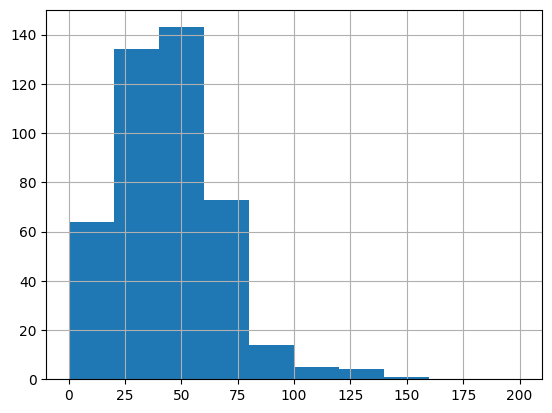

In [ ]:
dialogues = pd.read_csv('Family_Guy.csv', nrows = 50000)
peterDialog = dialogues.loc[dialogues["Character"]=="Peter Griffin"]
peterDialog['Dialogue'].str.len().hist(range=[0, 200])

<AxesSubplot:>

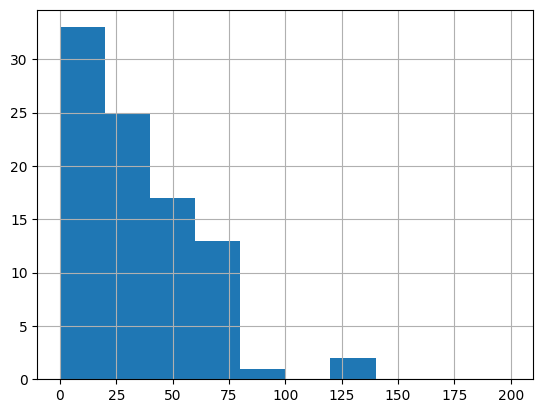

In [ ]:
dialogues = pd.read_csv('Family_Guy.csv', nrows = 50000)
megDialog = dialogues.loc[dialogues["Character"]=="Meg Griffin"]
megDialog['Dialogue'].str.len().hist(range=[0, 200])

<AxesSubplot:>

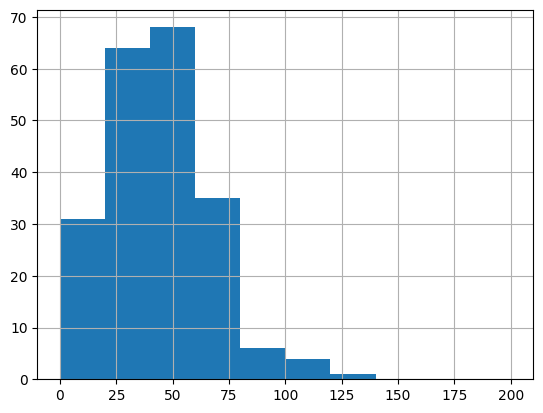

In [ ]:
dialogues = pd.read_csv('Family_Guy.csv', nrows = 50000)
louisDialog = dialogues.loc[dialogues["Character"]=="Lois Griffin"]
louisDialog['Dialogue'].str.len().hist(range=[0, 200])

<AxesSubplot:>

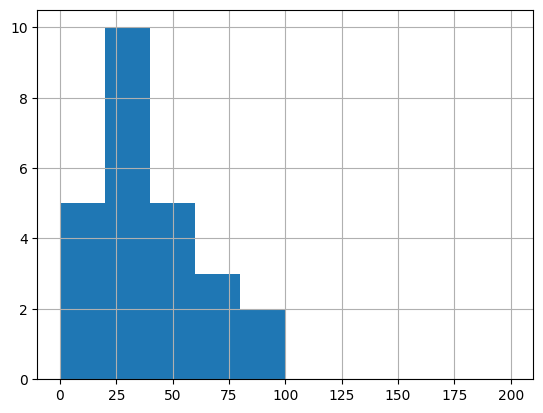

In [ ]:
dialogues = pd.read_csv('Family_Guy.csv', nrows = 50000)

chrisDialog = dialogues.loc[dialogues["Character"]=="Chris Griffin"]
chrisDialog['Dialogue'].str.len().hist(range=[0, 200])

<AxesSubplot:>

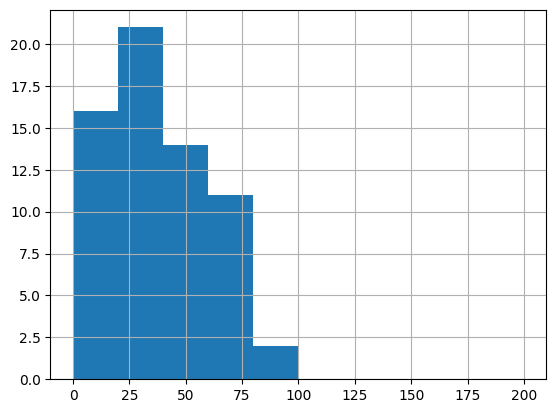

In [ ]:
dialogues = pd.read_csv('Family_Guy.csv', nrows = 50000)
brianDialog = dialogues.loc[dialogues["Character"]=="Brian Griffin"]
brianDialog['Dialogue'].str.len().hist(range=[0, 200])

Para uma comparação entre sexos se foi feito a partir da quantidade de falas dos personagens principais.

In [ ]:
len(peterDialog)

440

In [ ]:
len(louisDialog)

209

In [ ]:
len(stewieDialog)

124

In [ ]:
len(megDialog)

91

In [ ]:
len(brianDialog)

64

In [ ]:
len(chrisDialog)

25